# REDDIT APPLICATION
# CLASSWORK 3 - 08 FEBRUARY 2024

### PRAW PACKAGE AND AUTHENTICATION

In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Importing praw package
# Using id and secret from reddit app


import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="sbHLFiorA3Gpufvb-MhHEw",
    client_secret="OLCBrNddm9LH5HCLfyKuEf6uPbtCtg",
    user_agent=user_agent
)

### IMPORTING PACKAGES

In [51]:
# Importing pandas , numpy and regex modules

import pandas as pd
import numpy as np
import re 

### SELECT TRENDING TOPIC FROM REDDIT 

The **"bitcoin"** subreddit channel will be use for this project

In [52]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
204
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


### GET TOTAL COMMENT IN SUBREDDIT

In [53]:
# Top posts from the "bitcoin" subreddit using PRAW

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

786


### SCRAPPED DATA

In [54]:
# Create a dataframe from the scrapped data 

bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Fiat Wars with Scott Horton
1,Physical Coins
2,Updated <1hr ago. A couple more countries have...
3,Bought a new bag
4,Bitcoin is the solution to money printing by P...


### REMOVING UNWANTED COLUMNS

In [55]:
# Removes unwanted columns in left

df = bitcoin_df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Fiat Wars with Scott Horton
1,Physical Coins
2,Updated <1hr ago. A couple more countries have...
3,Bought a new bag
4,Bitcoin is the solution to money printing by P...


### RETRIEVING COLUMN TITLES

In [56]:
# Gives the column names

bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

### RENAMING COLUMNS

In [57]:
# Renaming the column to titles

bitcoin_df.columns = ['Titles']

## USING HEAD METHOD

In [58]:
# Gives first five columns in the dataframe

bitcoin_df.head()

,Titles
0,Fiat Wars with Scott Horton
1,Physical Coins
2,Updated <1hr ago. A couple more countries have...
3,Bought a new bag
4,Bitcoin is the solution to money printing by P...


### COUNT OF  DUPLICATE VALUES

In [59]:
#counts the number of duplicate values in the 'Titles' column
bitcoin_df.Titles.duplicated().sum() 

0

### TWITTER DATA PREPROCESSING FOR BITCOIN ANALYSIS

In [60]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

# Show the clean text
bitcoin_df.head()

,Titles
0,Fiat Wars with Scott Horton
1,Physical Coins
2,Updated <1hr ago. A couple more countries have...
3,Bought a new bag
4,Bitcoin is the solution to money printing by P...


### REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS

In [61]:
# Removing emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

# Show the clean text
bitcoin_df.head()

,Titles
0,Fiat Wars with Scott Horton
1,Physical Coins
2,Updated <1hr ago. A couple more countries have...
3,Bought a new bag
4,Bitcoin is the solution to money printing by P...


### TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD

In [62]:
# Importing modules

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF BITCOIN RELATED TEXT

In [63]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Fiat Wars with Scott Horton,0.000000,0.000000
1,Physical Coins,0.142857,0.000000
2,Updated <1hr ago. A couple more countries have...,0.500000,0.625000
3,Bought a new bag,0.454545,0.136364
4,Bitcoin is the solution to money printing by P...,0.000000,0.000000


### CATEGORIZING BITCOIN SENTIMENT

In [64]:
# Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Fiat Wars with Scott Horton,0.000000,0.000000,Neutral
1,Physical Coins,0.142857,0.000000,Neutral
2,Updated <1hr ago. A couple more countries have...,0.500000,0.625000,Positive
3,Bought a new bag,0.454545,0.136364,Positive
4,Bitcoin is the solution to money printing by P...,0.000000,0.000000,Neutral
5,The Pineapple fund; did we ever find out who t...,0.000000,0.000000,Neutral
6,All in,0.000000,0.000000,Neutral
7,What percent of us do you think are hodling th...,0.000000,0.000000,Neutral
8,Same old stories new year,0.259848,0.078788,Positive
9,"Saw this video, was wondering what you guys th...",0.000000,0.000000,Neutral


### Data Visualization

In [65]:
# create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### VISUALIZING BITCOIN SENTIMENT DISTRIBUTION

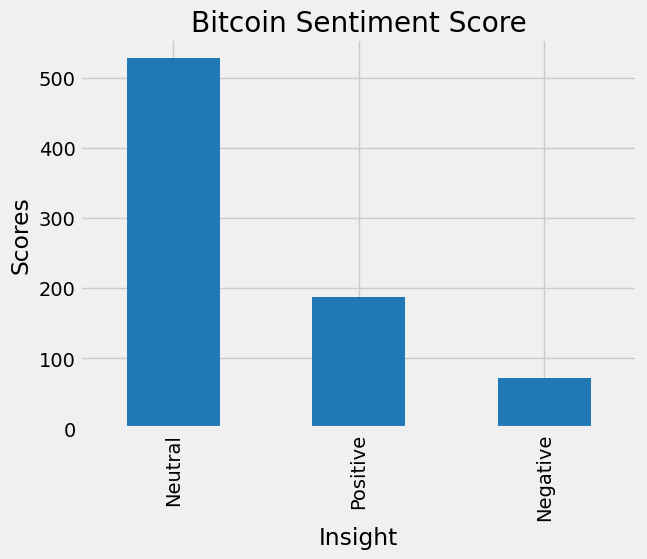

In [66]:
# Plot the values count of sentiment

plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

### WORDCLOUD FOR BITCOIN

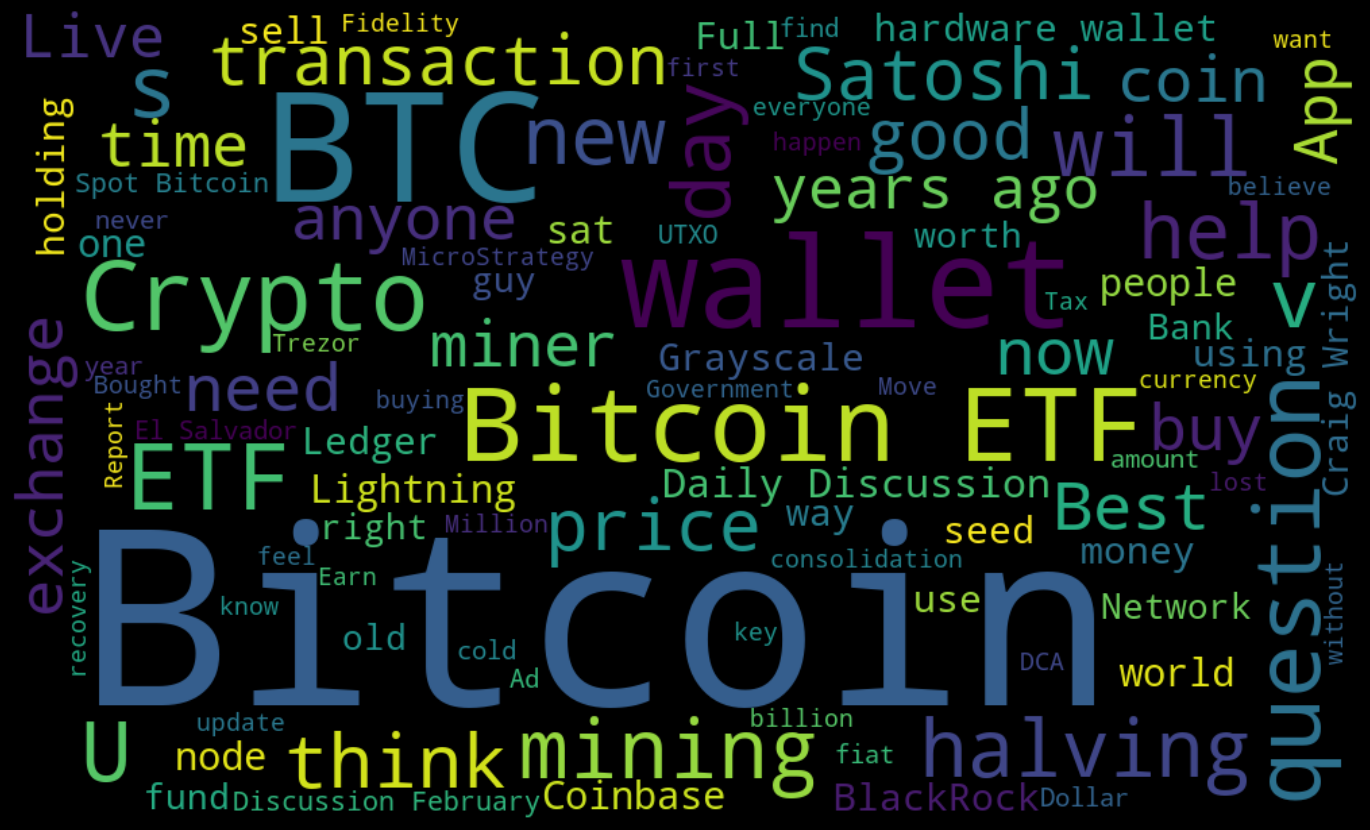

In [67]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");